In [1]:
import polars as pl
import polars.selectors as cs
import seaborn as sns

# Activity 2.5 - More Details on Preprocessing and Grid Search

## Topic 2 - Visualizing relationships with `sns.lmplot`

In this part of the activity, we will illustrate how to create proper faceted visualization in Python by

1. Stacking the numeric features using `polars`
2. Plotting faceted scatterplots with a smoother using `sns.lmplot`.

### Example 1 - Facetting numeric (only) features.

Turns out, we can use `sns.lmplot` to quickly create the visualizations we have been making in JMP, with the caveat that we will need to stack all numeric features.

### Step 1 - Load the `airquality.csv` data.

**Note.** We drop the `rownames`, as they have no predictive power.

In [3]:
(airqual :=
 pl.read_csv('sample_data/airquality.csv')
   .drop('rownames')
)

Ozone,Solar.R,Wind,Temp,Month,Day
i64,i64,f64,i64,i64,i64
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
null,null,14.3,56,5,5
…,…,…,…,…,…
30,193,6.9,70,9,26
null,145,13.2,77,9,27
14,191,14.3,75,9,28


#### Step 2 - Stack the numeric features.

**Note.** Here we use the target as an `index` to maintain the marginal relationships.

In [5]:
# Your code here
(airqual_stacked := 
 
airqual
    .unpivot(on = cs.numeric() - cs.by_name('Ozone'), 
        index = 'Ozone', 
        variable_name = 'Feature',
        value_name = 'Value'
    )

)

Ozone,Feature,Value
i64,str,f64
41,"""Solar.R""",190.0
36,"""Solar.R""",118.0
12,"""Solar.R""",149.0
18,"""Solar.R""",313.0
null,"""Solar.R""",null
…,…,…
30,"""Day""",26.0
null,"""Day""",27.0
14,"""Day""",28.0


#### Step 3 - Plot the relationships.

**Note.** We want to
1. Use the target as `y`,
2. Use the values as `x`,
3. Facet columns on the numeric features,
4. Add a `lowess` smoother, and
5. Set `sharex` to `False` to allow each x-axis it's own scale.


c:\Users\lr7273ow\AppData\Local\anaconda3\envs\polars\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


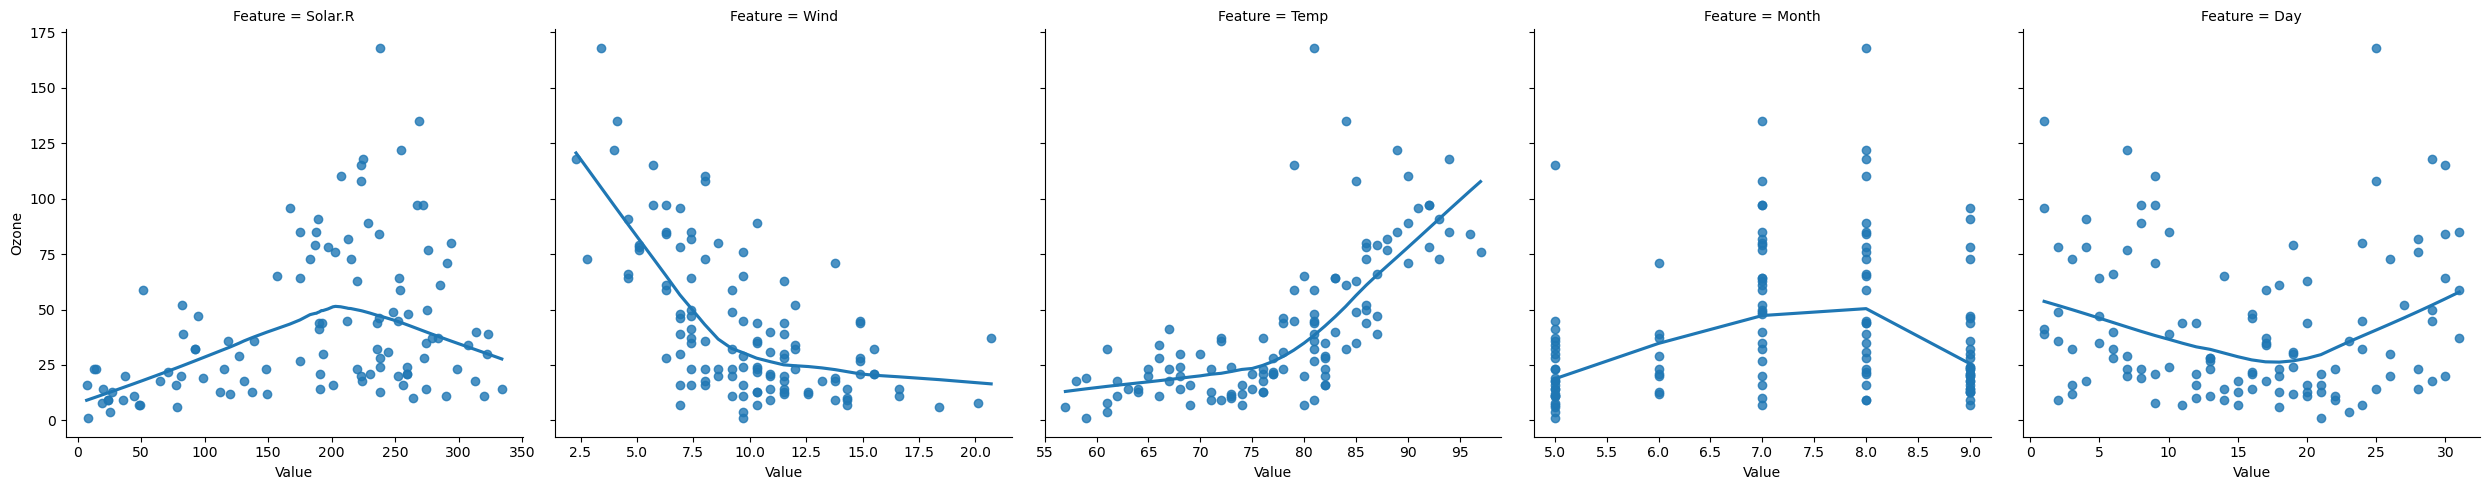

In [10]:
# Your code here

sns.lmplot(airqual_stacked.to_pandas(), 
           x = 'Value',
           y = 'Ozone',
           col = 'Feature',
           lowess = True, 
           sharex = False
)


#### Step 5 - Clean things up.

**Note.** Based on the previous plot, we should.
1. Fix the warning about `sharex`,
2. Reduce the alpha for the points, and
3. Add contrast to the line.

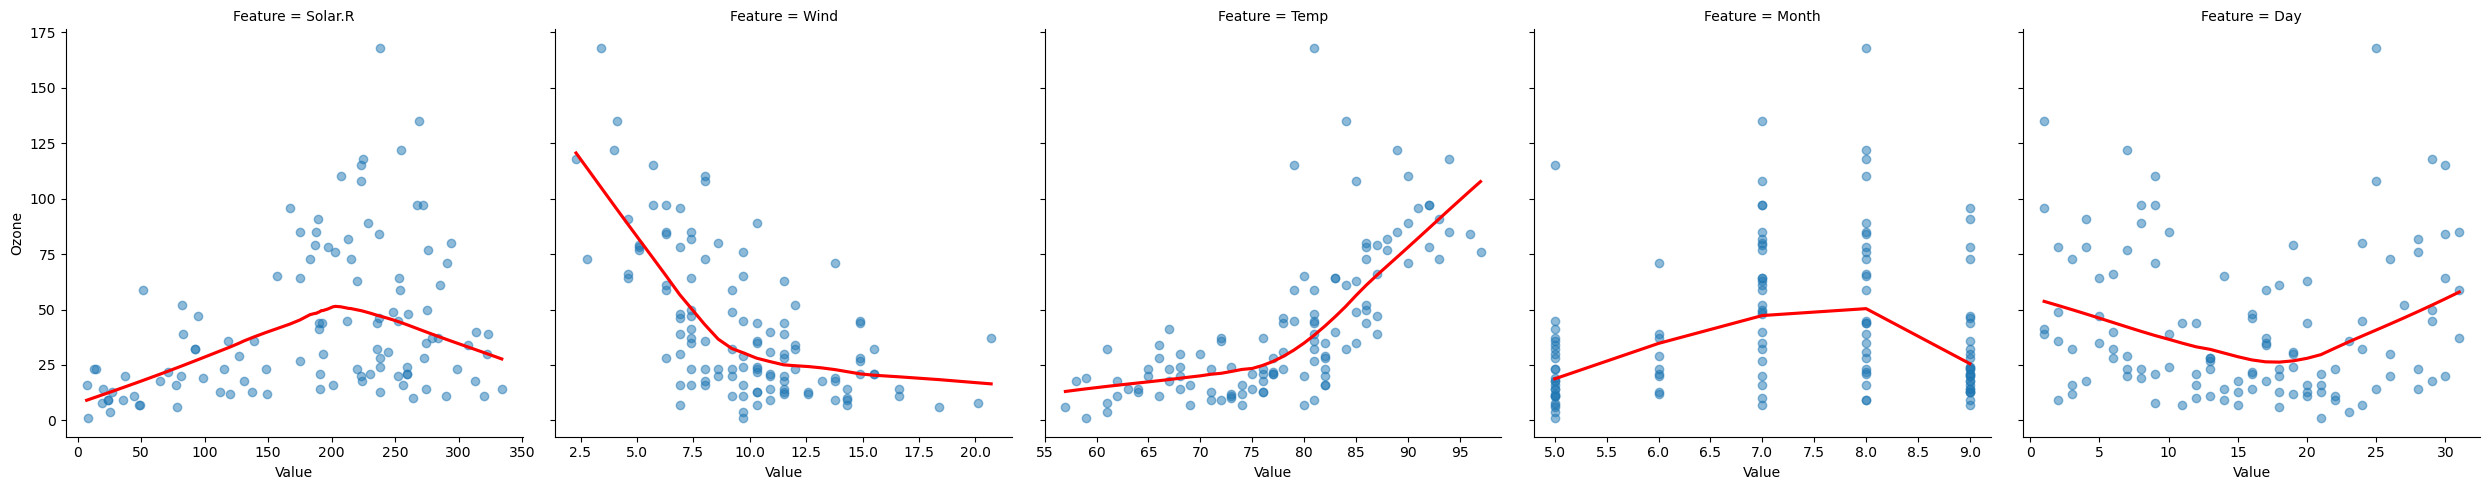

In [12]:
# Your code here.

sns.lmplot(airqual_stacked.to_pandas(), 
           x = 'Value',
           y = 'Ozone',
           col = 'Feature',
           lowess = True, 
           facet_kws = {'sharex': False},
           scatter_kws = {'alpha': 0.5},
           line_kws ={'color':'red'}
)


### Example 2 - Facet on both numeric and catorical features.

Next, we illustrate the proper approach to visualizing relationships with mixed types of features (categorical and numeric).

#### Step 1 - Load and clean up the data

**Notes.**
1. I dropped two categorical features for illustrations sake (too many unique labels), and
2. The `CHAS` column is actually categorical, but already has the OneHot transformation applied--I switched it back.

In [15]:
(boston :=
 pl.read_csv('sample_data/boston.csv')
   .drop('TOWN', 'TRACT')
   .with_columns(CHAS = pl.when(pl.col('CHAS') == 1)
                          .then(pl.lit('Yes'))
                          .otherwise(pl.lit('No'))
                )
)

LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,i64,i64,f64
-70.955,42.255,24.0,0.00632,18.0,2.31,"""No""",0.538,6.575,65.2,4.09,1,296,15.3
-70.95,42.2875,21.6,0.02731,0.0,7.07,"""No""",0.469,6.421,78.9,4.9671,2,242,17.8
-70.936,42.283,34.7,0.02729,0.0,7.07,"""No""",0.469,7.185,61.1,4.9671,2,242,17.8
-70.928,42.293,33.4,0.03237,0.0,2.18,"""No""",0.458,6.998,45.8,6.0622,3,222,18.7
-70.922,42.298,36.2,0.06905,0.0,2.18,"""No""",0.458,7.147,54.2,6.0622,3,222,18.7
…,…,…,…,…,…,…,…,…,…,…,…,…,…
-70.986,42.2312,22.4,0.06263,0.0,11.93,"""No""",0.573,6.593,69.1,2.4786,1,273,21.0
-70.991,42.2275,20.6,0.04527,0.0,11.93,"""No""",0.573,6.12,76.7,2.2875,1,273,21.0
-70.9948,42.226,23.9,0.06076,0.0,11.93,"""No""",0.573,6.976,91.0,2.1675,1,273,21.0


#### Step 2 - Stack the numeric features.

**Note.** Here we want to use both the target and all categorical features as the `index` to preserve the conditional relationships.

In [16]:
# Your code here

(boston_stacked :=
 
 boston
 .unpivot(on = cs.numeric()-cs.by_name('MEDV'),
                index = cs.string() | cs.by_name('MEDV'),
                variable_name = 'Feature', 
                value_name = 'Value'       

 )

)

MEDV,CHAS,Feature,Value
f64,str,str,f64
24.0,"""No""","""LON""",-70.955
21.6,"""No""","""LON""",-70.95
34.7,"""No""","""LON""",-70.936
33.4,"""No""","""LON""",-70.928
36.2,"""No""","""LON""",-70.922
…,…,…,…
22.4,"""No""","""PTRATIO""",21.0
20.6,"""No""","""PTRATIO""",21.0
23.9,"""No""","""PTRATIO""",21.0


#### Step 3 - Plot the relationships.

**Notes.** We want to
1. Use the target as `y`,
2. Use the values as `x`,
3. Facet columns on the numeric features, and
4. Use a `lowess` smoother, and
5. Apply the finishing touches seen above (`sharex`, alpha, contrast).


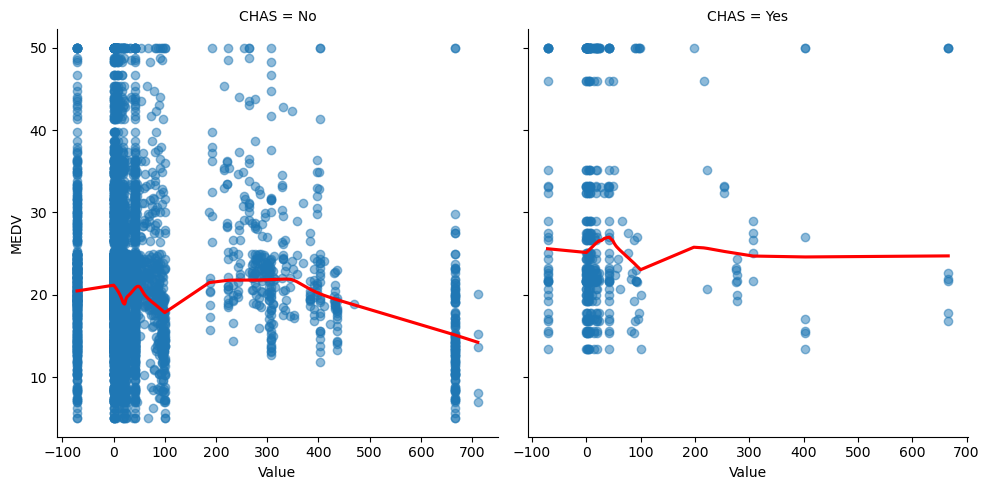

In [58]:
# Your code here

sns.lmplot(boston_stacked.to_pandas(),
           x = 'Value',
           y = 'MEDV',
           col = 'CHAS',
           lowess = True, 
           facet_kws = {'sharex': False},
           scatter_kws = {'alpha': 0.5},
           line_kws  = {'color':'red'}
)

## <font color="red"> Exercise 2.5.2 </font>

Now it's your turn: Visualize the relationships between the target and features in the `college_earnings.csv` data, where we are again trying to predict the `MedianEarnings` of college graduates using various features (both numeric and categorical).

In [36]:
# Your code here
(college_earnings :=
    pl.read_csv('./sample_data/college_earnings.csv')
 #   .drop(pl.col('FundingModel'))
)



FundingModel,AdmissionRate,ACTMedian,SATAverage,AverageCost,MedianEarnings
str,f64,i64,i64,i64,i64
"""Public""",0.8989,17,823,18888,27000
"""Public""",0.8673,25,1146,19990,37200
"""Public""",0.8062,26,1180,20306,41500
"""Public""",0.5125,17,830,17400,22400
"""Public""",0.5655,26,1171,26717,39200
…,…,…,…,…,…
"""Public""",0.594,24,1020,12946,49700
"""Public""",0.4107,21,1017,13028,49700
"""Public""",0.6443,20,954,22570,35800


In [35]:
#(num_features :=
# college_earnings 
# .select(cs.numeric() - cs.by_name('MedianEarnings'))
#)

In [41]:
(college_earnings_stacked :=
 

 college_earnings
 .unpivot(on = cs.numeric() - cs.by_name('MedianEarnings'),
          index= cs.string() | cs.by_name('MedianEarnings'), 
          variable_name = 'Feature',
          value_name = 'Value'
               
 )



)

FundingModel,MedianEarnings,Feature,Value
str,i64,str,f64
"""Public""",27000,"""AdmissionRate""",0.8989
"""Public""",37200,"""AdmissionRate""",0.8673
"""Public""",41500,"""AdmissionRate""",0.8062
"""Public""",22400,"""AdmissionRate""",0.5125
"""Public""",39200,"""AdmissionRate""",0.5655
…,…,…,…
"""Public""",49700,"""AverageCost""",12946.0
"""Public""",49700,"""AverageCost""",13028.0
"""Public""",35800,"""AverageCost""",22570.0


### plotting the relationship

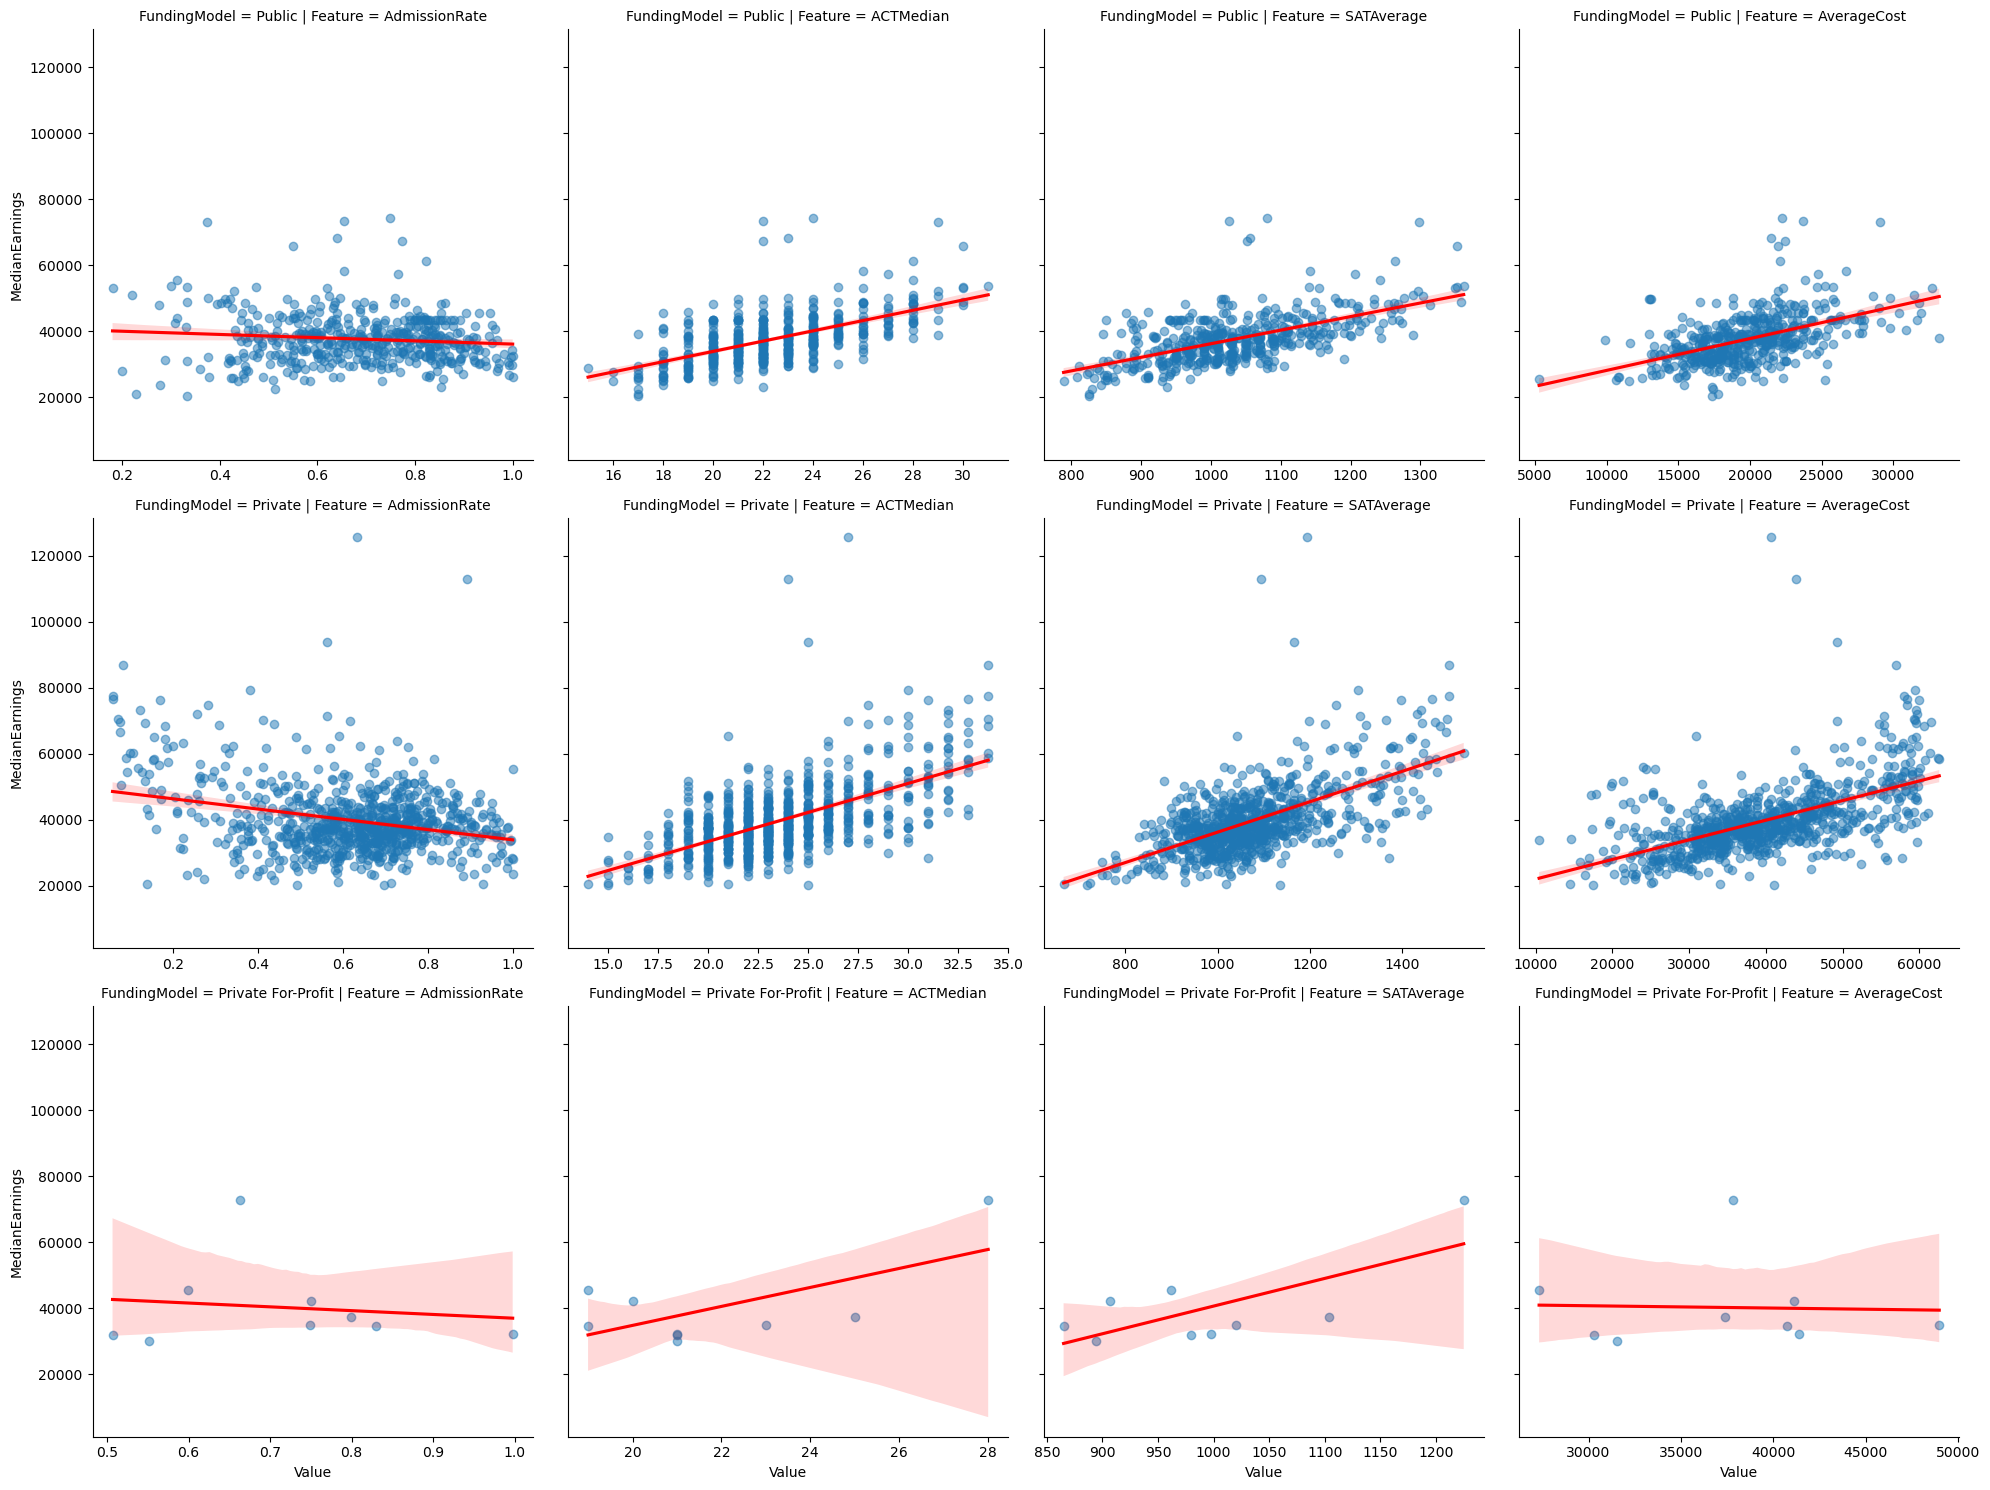

In [60]:
sns.lmplot(college_earnings_stacked.to_pandas(),
           x = 'Value',
           y = 'MedianEarnings',
           col  = 'Feature',
           row = 'FundingModel',
           lowess = False, 
           facet_kws = {'sharex': False},
           scatter_kws = {'alpha':0.5},
           line_kws  = {'color': 'red',}
           
           
           
           
           )